In [1]:
import networkx as nx
from minizinc import Instance, Model, Solver
import os

In [2]:
async def run_instance_async(data_file, solver_name, other_params={}, do_print=True):
  params = {'MaxPeriod_c': 1200}
  # override default params with other_params
  for param, v in other_params.items():
    params[param] = v
  model = Model("modelFiles/wallace-hoist_cpaior20-submission.mzn")
  # Get the model/data files
  model.add_file(data_file)
  # Add params to model
  for param, v in params.items():
    model[param] = v
  solver = Solver.lookup(solver_name)
  instance = Instance(solver, model)
  result = await instance.solve_async(intermediate_solutions=True)
  if len(result) == 0:
    print("Warning no results found")
    return -1
  return result[len(result) - 1].objective, result.statistics["solveTime"]

In [29]:
# from runMiniZinc import run_instance_async
# Cannot call asyncio.run in notebook. So we await the async method here

DATA_FOLDER = "data/dzn/"
files = os.listdir(DATA_FOLDER)
objs = []
secs = []
f = files[0]

obj, sec = await run_instance_async(DATA_FOLDER+f, "gurobi", {'MaxPeriod_c': 9999999}, do_print=False)
print(obj, sec)

obj, sec = await run_instance_async(DATA_FOLDER+f, "gurobi", {'MaxPeriod_c': 160}, do_print=False)
print(obj, sec)


/home/gijs/code_projects/AIDM-CHSP/venv/lib/python3.8/site-packages/minizinc/json.py:91: MiniZincWarning: file "PU.dzn" included from library, but also exists in current working directory.
  warnings.warn(obj["message"], MiniZincWarning)
/home/gijs/code_projects/AIDM-CHSP/venv/lib/python3.8/site-packages/minizinc/json.py:91: MiniZincWarning: variable `k` shadows variable with the same name in line 86.66
  warnings.warn(obj["message"], MiniZincWarning)


CancelledError: 

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import asyncio
import numpy as np

# computing outputs and save to file
DATA_FOLDER = "data/dzn/"
files = list(filter(lambda f: f.endswith('dzn'), os.listdir(DATA_FOLDER)))
objs = []
secs = []
def run(f):
  return asyncio.run(run_instance_async(DATA_FOLDER+f, "gecode"))

loop = asyncio.get_event_loop()
p = ProcessPoolExecutor(8)
loops = []
for f in files:
  loops.append(loop.run_in_executor(p, run, f))
dnz_output_file = 'data/solved/dzn_output1000.npy'
for l in loops:
   ret = await l
   obj, sec = ret if ret != -1 else (-1,-1)
   objs.append(obj)
   secs.append(sec)
   print(objs)
   np.save(dnz_output_file, {'obj':objs, 'sec':secs})

In [6]:
# dnz_output_file = 'data/solved/dzn_output.npy'
# dnz_output_file = 'data/solved/dzn_output.npy'
# multiplier 1
# hoists [1, 1, 1, 1]
# removal times [0, 170, 183, 246]
# sorted removal times [0, 170, 183, 246]
# period 343
# B [0, 1, 0]
# jobs 1
# Duration: 1.249 seconds
# Solver: gecode
import os
import numpy as np

DATA_FOLDER = "chsp-generators-main/instances/linear_solutions/"
files = os.listdir(DATA_FOLDER)
for f in files:
  if f.endswith('npy'):
    print(np.load(DATA_FOLDER+f, allow_pickle=True))
# np.save('data')

{'objective': 7479, 'r': [0, 523, 553, 3232, 20, 3259], 'p': 7479, 'hoist': [1, 1, 1, 1, 1, 1], 'B': [0, 1, 0, 1, 0]}


In [15]:


def get_params_of_file(file, folder=DATA_FOLDER):
  params = {}
  with open(folder+file) as f:
    print('t', file)
    for line in f:
      split = line.split()
      param, val = split[0], split[2][:-1]
      params[param] = int(val)
  return params
# Save params to numpy file
param_list = []
for f in files:
  param_list.append(get_params_of_file(f))
np.save('data/dzn/dzn.npy', param_list)

t 1-4-1.dzn
t 2-1-1.dzn
t 2-3-2.dzn
t 2-2-1.dzn
t 3-1-1.dzn
t 2-3-1.dzn
t 1-2-1.dzn
t 1-2-2.dzn
t 2-2-3.dzn
t 1-5-1.dzn
t 1-3-2.dzn
t 1-1-1.dzn
t 2-4-1.dzn
t 2-3-3.dzn
t 2-2-2.dzn
t 1-3-1.dzn


In [2]:
from imitation_learning.train import load_graph_data
path = './chsp-generators-main/instances/linear_solutions.npy'
training, test = load_graph_data(path)

Graph(num_nodes=5, num_edges=25,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(1,), dtype=torch.float32)})

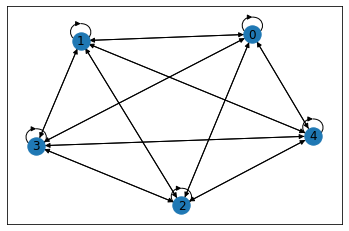

In [14]:
import networkx as nx
g_x = training[0][0].to_networkx()
nx.draw_networkx(g_x)


In [20]:
import numpy as np

training = np.array(training, dtype=object)
training[1:20,1]

array([tensor([[110.,  39.,  56., 178.]]),
       tensor([[106.,  24.,  36., 146.]]),
       tensor([[ 14.,  92., 109., 132.]]),
       tensor([[ 91.,  99., 113., 143.]]),
       tensor([[ 58.,  79., 145., 167.]]),
       tensor([[   6., 1626., 4757., 5346.]]),
       tensor([[ 208., 1983., 2006., 4742.]]),
       tensor([[   5.,   11.,  227., 1347.]]),
       tensor([[   9.,  827., 2537., 3176.]]),
       tensor([[1126., 1139., 1879., 3874.]]),
       tensor([[  39., 5168., 5196., 7608.]]),
       tensor([[  9., 109., 118., 242.]]),
       tensor([[136., 237., 248., 328.]]),
       tensor([[ 12., 176., 250., 284.]]),
       tensor([[ 12.,  37.,  63., 203.]]),
       tensor([[  5.,  11.,  59., 156.]]),
       tensor([[107.,  48.,  65., 154.]]),
       tensor([[   7.,  876., 3680., 4055.]]),
       tensor([[  10.,  236.,  344., 1527.]])], dtype=object)

In [175]:
import dgl
import numpy as np
import torch as th
from dgl.nn import EGATConv
num_nodes, num_edges = 5, 25
graph = training[1][0]
# generate a graph
# graph = dgl.rand_graph(num_nodes,num_edges)
node_data = graph.ndata['x']
# node_data[0][1] = 0
# node_data[-1][1] = 0
node_feats = th.rand((num_nodes, 3))
edge_feats = th.rand((num_edges, 1))
num_heads = 1
outputs = (3,1)
egat = EGATConv(in_node_feats=3,
                in_edge_feats=1,
                out_node_feats=outputs[0],
                out_edge_feats=outputs[1],
                num_heads=num_heads)

#forward pass
output_shape1 = np.array(outputs)*num_heads
nodes, edges = output_shape1

new_node_feats, new_edge_feats = egat(graph, graph.ndata['x'], graph.edata['w'])
# new_node_feats, new_edge_feats = egat(graph, node_feats, edge_feats)
new_node_feats2 = new_node_feats.reshape(-1, nodes)
new_edge_feats = new_edge_feats.reshape(-1, edges)
print(new_node_feats.shape)
print(new_node_feats2.shape)
# new_node_feats, new_edge_feats = egat(graph, new_node_feats, new_edge_feats)
# new_node_feats, new_edge_feats = egat(graph, new_node_feats, new_edge_feats)
# new_node_feats.shape, new_edge_feats.shape
new_node_feats, new_edge_feats
# node_data[0][1]
# graph.ndata['x']

torch.Size([5, 1, 3])
torch.Size([5, 3])


(tensor([[[-444.2279,   74.5986, -197.7197]],
 
         [[-444.2279,   74.5986, -197.7197]],
 
         [[-444.2279,   74.5986, -197.7197]],
 
         [[-444.2279,   74.5986, -197.7197]],
 
         [[-444.2279,   74.5986, -197.7197]]], grad_fn=<ViewBackward0>),
 tensor([[ 31.7720],
         [417.2596],
         [359.9719],
         [683.5318],
         [ 16.3583],
         [128.5764],
         [522.4540],
         [465.1663],
         [788.7261],
         [117.3577],
         [107.7470],
         [501.6246],
         [452.7267],
         [776.2867],
         [100.7233],
         [177.3656],
         [571.2432],
         [522.3453],
         [854.2951],
         [174.5368],
         [ 15.4136],
         [405.0963],
         [352.0034],
         [679.7583],
         [  0.0000]], grad_fn=<ReshapeAliasBackward0>))